#  Multiclass Image Classification Using TensorFlow's MNIST Digits Dataset

## 1 Objectives of the Classification

The objective of a Multiclass Image Classification on TensorFlow's MNIST Digits Dataset is to accurately recognize and classify handwritten digits from 0 to 9, based on the grayscale images provided in the dataset. It involves training a model to understand the patterns of pixels that correspond to each digit and then using that model to predict the classification of new, unseen images.

### 1.1 Problem Statement

Develop a machine learning model capable of categorizing images of handwritten digits into one of several classes, with each class representing a distinct digit from 0 to 9. This model could improve digital document analysis by automating the transcription of handwritten numbers in forms, bank checks, or invoices, enhancing accuracy and efficiency in data entry processes.

### 1.2 Understanding Multiclass Image Classification

Multiclass image classification is a type of machine learning problem where the task is to classify an image into one of several distinct classes. In contrast to binary classification, where there are only two possible outcomes, multiclass classification deals with situations where there are more than two classes. The classifier must be able to recognize and differentiate between all the possible classes in which each image could belong. For example, in the case of the MNIST dataset, the goal is to classify each image into one of the ten classes corresponding to the digits 0 to 9. Each input image is assigned a single label from the predefined set of categories.

### 1.3 Why Multiclass Image Classification Instead of Other Types of Classification?

 The MNIST dataset specifically contains images of handwritten digits that range from 0 to 9, resulting in ten possible categories for classification. A multiclass image classification model is the most apt approach since it allows for prediction across these ten discrete classes, matching the inherent structure of the dataset. If another type of classification were used, such as binary, it would not suffice because binary classification is limited to distinguishing between just two classes, whereas the MNIST dataset requires distinction among ten different classes.

### 1.4 Measure of Success

An effective measure of success for Multiclass Image Classification on the MNIST dataset can be the overall accuracy of the model, which is the proportion of correctly classified images out of the total number of images in the test set.

Accuracy quantifies the proportion of images correctly classified by the model out of the total images tested. In multiclass image classification for handwritten digits, accurate classification is critical as each class represents a distinct character that could significantly alter the meaning of the information being processed, such as an account number or monetary value. Hence, a high accuracy ensures reliability and usefulness of the model in practical applications where misclassification could lead to errors with tangible consequences.

### 1.5 Evaluation Protocol

Holdout validation will be used as an evaluation protocol for this multiclass image classification because it provides a straightforward way to test a model's performance on unseen data. By splitting the dataset into separate training and test sets, with the holdout test set not used during training, we can simulate real-world conditions where the model must make predictions on data it has not previously encountered. This approach helps in assessing the model's generalizability and prevents overfitting by ensuring that the evaluation is unbiased and represents the model's ability to handle new, diverse examples.

## 2 Base Model

### 2.1 Install Packages

In [ ]:
!pip install tensorflow-datasets -q
!pip install tensorflow -q
!pip install opencv-python

### 2.2 Import Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import Counter
import cv2

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import RMSprop

In [ ]:
# ensure reproducibility of results
tf.random.set_seed(66)
np.random.seed(66)

### 2.3 Data Inspection

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


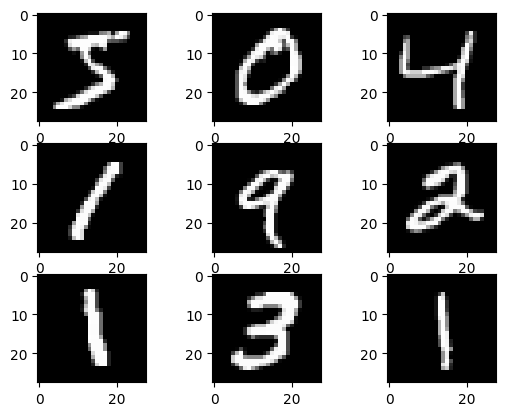

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# a summary of the dataset to verify the data's dimensionality before training or testing a model
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))

# plots and inspects the first nine handwritten digit images from the MNIST training dataset
for i in range(9):
 plt.subplot(330 + 1 + i)
 plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
plt.show()

### 2.4 Data Normalization

Normalizing the data is essential before performing multiclass image classification for several reasons:

  - Consistent Scale: Normalization ensures that all input features (in this case, pixel values) are on a consistent scale. For an image, this means converting pixel values from a range of 0-255 to a range like 0-1.

  - Faster Convergence: Learning algorithms typically converge much faster on normalized data because it helps in reducing skews and disparities in the dataset.

  - Avoidance of Numerical Instability: Many algorithms compute the distances between pairs of samples, and if the scale of the features is not consistent, it can lead to numerical instability and a biased weighing of importance among features.

  - Improved Gradient Descent: When using gradient descent optimization, feature scaling can prevent the optimizer from getting stuck in local optima and instead help it to reach the global minimum more efficiently.

Overall, normalization is a crucial preprocessing step that can significantly affect the performance of a multiclass image classification model, such as one trained on the MNIST dataset.


In [ ]:
# normalizes the training and testing datasets by scaling the features to a range of 0 to 1
X_train, X_test = X_train/255, X_test/255

### 2.5 Data One-Hot Encoding


One-hot encoding the datasets serves to transform the categorical class labels into a binary matrix representation. Each class label is converted into a vector that length is equal to the number of classes, in this case, 10 for the digits 0 to 9. Each vector has a single '1' which corresponds to the class of the digit and '0's in all other positions, ensuring the model can effectively interpret the class labels during the training process. It's a standard preprocessing step for classification problems where the output should reflect the probability of the input belonging to each class category.

In [ ]:
y_train_one_hot = to_categorical(y_train, num_classes = 10)
y_test_one_hot = to_categorical(y_test, num_classes = 10)

### 2.6 Data Holdout Set

Provides a separate dataset (X_holdout, y_holdout) on which to validate the machine learning model during training, while continuing to train the model on a slightly reduced portion of the training data (X_train, y_train). This helps to estimate the model's performance on unseen data and prevent overfitting.

In [ ]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X_train, y_train_one_hot, test_size = 0.2, random_state = 66)

### 2.7 Creating a Model that Outperforms a Basic Baseline Model

In "Deep Learning with Python" by Francois Chollet, it's recommended that any neural network model built for classifying images from the MNIST dataset should aim to surpass a basic accuracy threshold of 10%. For a problem and dataset that fall under the multiclass, single-label classification category, it's appropriate to use the softmax activation function in the final layer. This enables the model to output a probability distribution across the ten possible digit classes. The chosen loss function to work in tandem with this type of problem is categorical_crossentropy, as it's suitable for multiclass classification tasks. An optimizer is required to adjust the weights of the network in the right direction and at the right magnitude during training. Here, the rmsprop optimizer will be used with its default settings, including the learning rate.


### 2.8 Naive Majority Class Baseline

Establishing a Naive Majority Class Baseline before developing a model is required because it provides a simple reference point. If your model cannot outperform this basic baseline, which simply predicts the majority class for every input, it might not be extracting useful patterns from the data.

This baseline assumes that the most frequent class in the dataset is the prediction for all instances. If, for example, the number 3 is the most common digit in the training dataset, then this baseline approach would predict that every input represents the digit 3. This simplistic strategy serves as a benchmark for more complex models.

In [ ]:
# converts the one-hot encoded labels back to their original categorical label format
y_train_labels = np.argmax(y_train, axis = 1)

# finds the most common class label in y_train_labels and its corresponding count
highest_label = Counter(y_train_labels).most_common(1)[0][0]
highest_label_count = Counter(y_train_labels).most_common(1)[0][1]

# gives the accuracy of always predicting the most frequent class from the training set (highest_label) when evaluated on the test set
test_label_counts = Counter(y_test)
naive_accuracy = test_label_counts[highest_label] / len(y_test)

print("Label with most samples in the training set:")
print("Digit: %s, w/ count of %s samples" % (highest_label, highest_label_count))
print("Naive Baseline Accuracy: {:0.2f}%".format(naive_accuracy * 100))

Label with most samples in the training set:
Digit: 1, w/ count of 5359 samples
Naive Baseline Accuracy: 11.35%


Having established a baseline accuracy of 11%, which is more than the mentioned 10%, we will proceed with building our base machine learning model.

### 2.9 Building the Base Model

Below is the set up of various parameters and a callback for training a neural network model:

  - INPUT_DIMENSION: Specifies the input shape of the data, in this case, 28x28, which might represent the pixel dimensions of an image.
  
  - OUTPUT_CLASSES: The number of classes for the output layer of the model, indicating a 10-class classification problem (such as digits 0-9 in the MNIST dataset).
  
  - OPTIMIZER: Defines the optimization algorithm to be used during training; 'rmsprop' is a type of gradient descent algorithm.
  
  - LOSS_FUNC: The loss function to be used during training, here 'categorical_crossentropy' is suitable for multi-class classification problems.
  
  - METRICS: A list of metrics to be evaluated by the model during training and testing; 'categorical_accuracy' measures the frequency with which the index of the maximal true value is equal to the index of the maximal predicted value.
  
  - MONITOR: The metric to be monitored during training, in this case, validation loss ('val_loss').
  
  - PATIENCE: The number of epochs with no improvement on the monitored metric after which training will be stopped.
  
  - EARLY_STOP: An EarlyStopping callback that will stop training when the monitored metric (validation loss) stops improving, restoring model weights from the epoch with the best value of the monitored metric.

The EarlyStopping callback is particularly useful to prevent overfitting and to save computational resources by stopping training once the model ceases to show improvement on a validation dataset.


In [ ]:
INPUT_DIMENSION = (28, 28)
OUTPUT_CLASSES = 10
OPTIMIZER = 'rmsprop'
LOSS_FUNC = 'categorical_crossentropy'
METRICS = ['categorical_accuracy']
MONITOR = 'val_loss'
PATIENCE = 5
EARLY_STOP = EarlyStopping(monitor = MONITOR, restore_best_weights = True, patience = PATIENCE, verbose = 0)

In [ ]:
# defines and summarize a simple neural network architecture
base_model = Sequential([
    Flatten(input_shape = (28, 28)),
    Dense(128, activation = 'relu'),
    Dense(10, activation = 'softmax')
], name = 'base_model')
base_model.summary()

Model: "base_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_33 (Flatten)        (None, 784)               0         
                                                                 
 dense_144 (Dense)           (None, 128)               100480    
                                                                 
 dense_145 (Dense)           (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# configures the base_model for the training process
base_model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

# initiates the training process of the base_model neural network
base_model_history = base_model.fit(X_train, y_train,
                 epochs = 5, batch_size = 64,
                 validation_data = (X_holdout, y_holdout),
                 callbacks = [EARLY_STOP])

# evaluates the trained base_model on the holdout dataset (X_holdout, y_holdout) to determine its loss and accuracy metrics
test_loss, test_acc = base_model.evaluate(X_holdout, y_holdout)
print('Validation Accuracy: {:.2f}%'.format(test_acc * 100))

Epoch 1/5
750/750 [==============================] - 4s 5ms/step - loss: 0.3137 - accuracy: 0.9126 - val_loss: 0.2024 - val_accuracy: 0.9424
Epoch 2/5
750/750 [==============================] - 4s 5ms/step - loss: 0.1497 - accuracy: 0.9561 - val_loss: 0.1356 - val_accuracy: 0.9600
Epoch 3/5
750/750 [==============================] - 3s 4ms/step - loss: 0.1055 - accuracy: 0.9695 - val_loss: 0.1132 - val_accuracy: 0.9647
Epoch 4/5
750/750 [==============================] - 4s 5ms/step - loss: 0.0817 - accuracy: 0.9754 - val_loss: 0.0976 - val_accuracy: 0.9711
Epoch 5/5
375/375 [==============================] - 1s 2ms/step - loss: 0.0959 - accuracy: 0.9706
Validation Accuracy: 97.06%


In [ ]:
def plot_training_loss(history) :
    # visualizes the training and validation loss over epochs during the training process of a neural network model
    # uses a history object which contains the loss values at each epoch
    loss, val_loss = history.history['loss'], history.history['val_loss']
    epochs = range(1, len(loss)+1)

    # training loss in magenta and validation loss in cyan
    plt.plot(epochs, loss, 'm', label='Training Loss')
    plt.plot(epochs, val_loss, 'c', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()
    _ = plt.show()

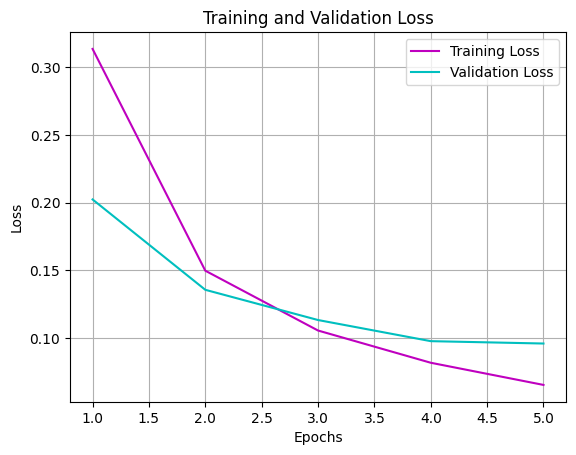

In [ ]:
plot_training_loss(base_model_history)

In [ ]:
def plot_training_accuracy(history) :
    # plots the training and validation accuracy of the neural network against the number of epochs,
    # indicating how the accuracy changes over time as the network is trained
    # it makes use of a history object that contains the accuracy metrics.
    acc, val_acc = history.history['accuracy'], history.history['val_accuracy']
    epochs = range(1, len(acc)+1)

    # training loss in magenta and validation loss in cyan
    plt.plot(epochs, acc, 'm', label = 'Training Acc.')
    plt.plot(epochs, val_acc, 'c', label = 'Validation Acc.')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()
    _ = plt.show()

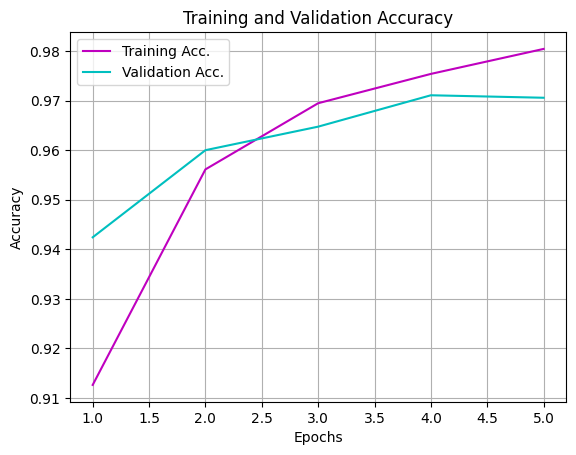

In [ ]:
plot_training_accuracy(base_model_history)

In [ ]:
# compares the fundamental model's accuracy with a simple baseline to verify its effectiveness
base_model_scores = base_model.evaluate(X_test, y_test_one_hot, verbose = 0)[1:]
print('(Accuracy (Validation Set): {:.2f}%) (Majority Class (Naive Baseline): {:.2f}%)'.format(base_model_scores[0] * 100, naive_accuracy * 100))

(Accuracy (Validation Set): 97.43%) (Majority Class (Naive Baseline): 11.35%)


With these results, we can observe that our initial model outperforms the baseline, achieving greater statistical significance than the naive approach. These outcomes validate our prior assumptions, confirming that predicting the target label from the given input is indeed feasible. This supports the notion that a predictive correlation exists and that the dataset supplied by TensorFlow furnishes ample information to discern the connection between the inputs and the predicted outputs of the MNIST dataset.

### 2.10 Identification of Overfitting from Loss and Validation Plots

To confirm our model's adequacy, it's essential to ascertain that it resides at the ideal midpoint between being overfit and underfit. We can assess this by trying one of three strategies: introducing additional layers, enlarging the current layers, or lengthening the training time by running additional epochs.

The overfitted model below contains 3 additional layers with activations, which might lead to overfitting, especially if trained on a small dataset or without adequate regularization. Overfitting occurs when a model learns the training data too well, including noise and details, to the extent that it negatively impacts the model's performance on new, unseen data.

The overfitted model also runs for 20 epochs which is quadruple the base model.

In [ ]:
# defines a neural network architecture that may potentially overfit the training data due to additional layers
overfitted_model = Sequential([
                    Flatten(input_shape=(28, 28)),
                    Dense(128, activation = 'relu'),
                    Dense(64, activation = 'relu'),
                    Dense(48, activation = 'relu'),
                    Dense(16, activation = 'relu'),
                    Dense(10, activation = 'softmax')
], name = 'overfitted_model')
overfitted_model.summary()

Model: "overfitted_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_34 (Flatten)        (None, 784)               0         
                                                                 
 dense_146 (Dense)           (None, 128)               100480    
                                                                 
 dense_147 (Dense)           (None, 64)                8256      
                                                                 
 dense_148 (Dense)           (None, 48)                3120      
                                                                 
 dense_149 (Dense)           (None, 16)                784       
                                                                 
 dense_150 (Dense)           (None, 10)                170       
                                                                 
Total params: 112810 (440.66 KB)
Trainable params:

In [ ]:
# compiles the overfitted model, preparing it for training
overfitted_model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

# trains the overfitted_model using the training data with increased number of epochs
overfitted_model_history = overfitted_model.fit(X_train, y_train,
                 epochs = 20, batch_size = 64,
                 validation_data = (X_holdout, y_holdout))

# evaluates the trained overfitted_model on the holdout set,
# consisting of the input data X_holdout and the corresponding target labels y_holdout
test_loss, test_acc = overfitted_model.evaluate(X_holdout, y_holdout)
print('Validation Accuracy: {:.2f}%'.format(test_acc * 100))

Epoch 1/20
750/750 [==============================] - 6s 7ms/step - loss: 0.3689 - accuracy: 0.8936 - val_loss: 0.2001 - val_accuracy: 0.9397
Epoch 2/20
750/750 [==============================] - 4s 5ms/step - loss: 0.1466 - accuracy: 0.9557 - val_loss: 0.1292 - val_accuracy: 0.9615
Epoch 3/20
750/750 [==============================] - 4s 5ms/step - loss: 0.1022 - accuracy: 0.9695 - val_loss: 0.1138 - val_accuracy: 0.9656
Epoch 4/20
750/750 [==============================] - 5s 6ms/step - loss: 0.0787 - accuracy: 0.9764 - val_loss: 0.0964 - val_accuracy: 0.9712
Epoch 5/20
750/750 [==============================] - 4s 5ms/step - loss: 0.0629 - accuracy: 0.9811 - val_loss: 0.1097 - val_accuracy: 0.9688
Epoch 6/20
750/750 [==============================] - 4s 5ms/step - loss: 0.0529 - accuracy: 0.9840 - val_loss: 0.1125 - val_accuracy: 0.9705
Epoch 7/20
750/750 [==============================] - 5s 6ms/step - loss: 0.0434 - accuracy: 0.9864 - val_loss: 0.1112 - val_accuracy: 0.9720
Epoch 

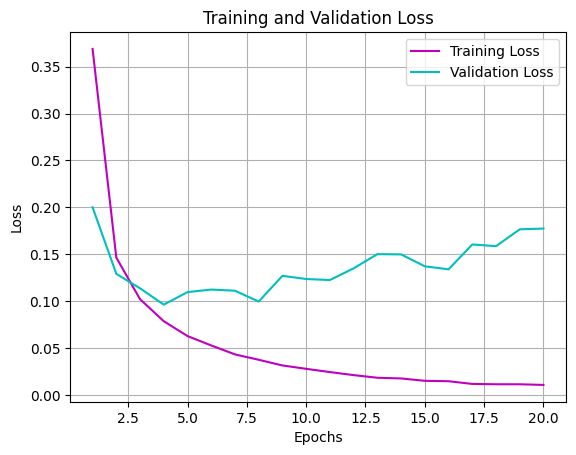

In [ ]:
plot_training_loss(overfitted_model_history)

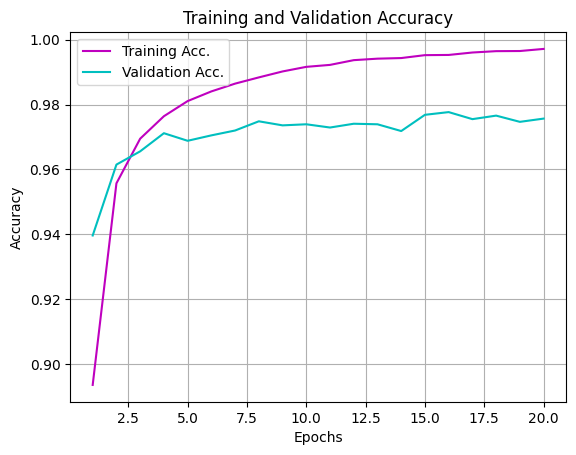

In [ ]:
plot_training_accuracy(overfitted_model_history)

By employing the plotting functions we created earlier, we can observe that relative to the fundamental model, the modified one—with more layers and extended training—demonstrated high accuracy on the training set but fell short on the validation set. This discrepancy indicates overfitting, suggesting that the model has learned the training data too closely rather than generalizing to new, unseen data.

## 3 Systematic Investigation of Hyperparameter Settings

After creating an initial neural network and an alternative version susceptible to overfitting, our goal is to fine-tune the hyperparameters to perfect the model. We plan to employ a range of techniques, such as dropout to prevent over-dependence on any single neuron, adjusting the number of layers to find the optimal depth, and using L1 and L2 regularization to discourage complexity. Additionally, we will experiment with different hyperparameters, including the number of neurons in each layer and the learning rate, to find the optimal settings. These efforts are aimed at developing a model that exhibits steadily decreasing and then stabilizing loss curves for both training and validation data, indicating a balanced and reliable performance.

### 3.1 Identification of Optimal Epochs from Loss and Validation Plots

Since the initial model yielded a higher validation accuracy with fewer epochs, we'll experiment with scaling back the training epochs and observe its impact on the model's accuracy. We've devised a function designed to identify the training epoch at which the validation loss is minimized to facilitate this process.

In [ ]:
def optimal_epoch(history):
    # determines the epoch number at which the model achieves the minimum validation loss when trained
    # this function helps in identifying the best epoch to stop training to prevent overfitting
    min_epoch = np.argmin(history['val_loss']) + 1
    print("Minimum validation loss reached in epoch: {}".format(min_epoch))
    return min_epoch

In [ ]:
optimal = optimal_epoch(overfitted_model_history.history)

Minimum validation loss reached in epoch: 4


In [ ]:
model1 = Sequential([
                    Flatten(input_shape=(28, 28)),
                    Dense(128, activation = 'relu'),
                    Dense(64, activation = 'relu'),
                    Dense(48, activation = 'relu'),
                    Dense(16, activation = 'relu'),
                    Dense(10, activation = 'softmax')
], name='model_1')

model1.summary()
model1.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

# runs the model using the optimal number of epochs
model1_history = model1.fit(X_train, y_train,
                 epochs = optimal, batch_size = 64,
                 validation_data = (X_holdout, y_holdout))

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_35 (Flatten)        (None, 784)               0         
                                                                 
 dense_151 (Dense)           (None, 128)               100480    
                                                                 
 dense_152 (Dense)           (None, 64)                8256      
                                                                 
 dense_153 (Dense)           (None, 48)                3120      
                                                                 
 dense_154 (Dense)           (None, 16)                784       
                                                                 
 dense_155 (Dense)           (None, 10)                170       
                                                                 
Total params: 112810 (440.66 KB)
Trainable params: 112810 (

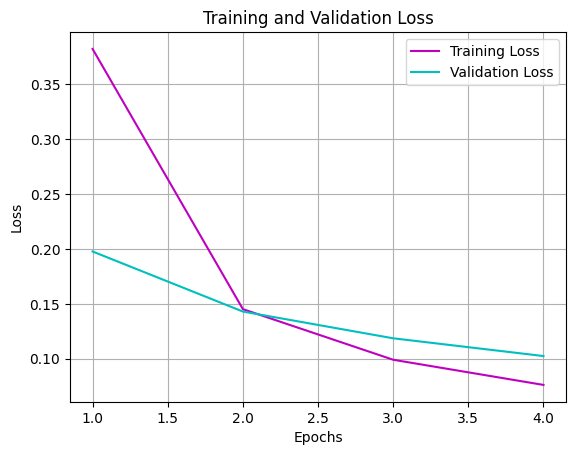

In [ ]:
plot_training_loss(model1_history)

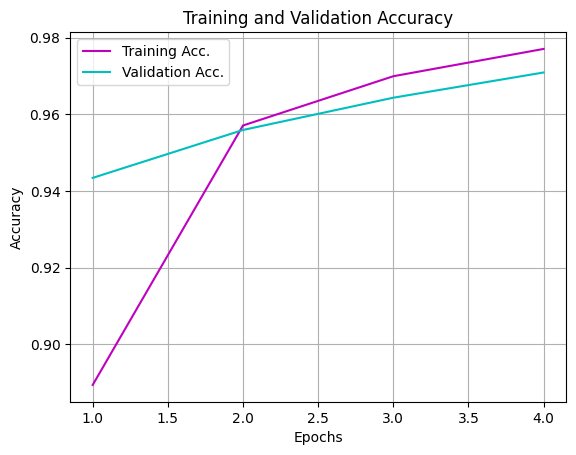

In [ ]:
plot_training_accuracy(model1_history)

It's evident that decreasing the training epochs from 20 to 4 diminished the tendency to overfit. Nevertheless, the loss curves still haven't reached a state of equilibrium.

### 3.2 Dropout Regularization with Loss and Validation Plots

In our subsequent model iteration, we will employ Dropout, a technique where specific neurons in each layer are ignored during the training process. This strategy combats overfitting by guaranteeing that the units within a layer do not become interdependent.

In [ ]:
model2 = Sequential([
                    Flatten(input_shape = (28, 28)),
                    Dense(128, activation = 'relu'),
                    Dense(64, activation = 'relu'),
                    Dropout(0.5), # insert dropout layers following the initial two dense layers in the model
                    Dense(48, activation = 'relu'),
                    Dense(16, activation = 'relu'),
                    Dense(10, activation = 'softmax')
], name = 'model_2')

model2.summary()
model2.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

model2_history = model2.fit(X_train, y_train,
                 epochs = optimal, batch_size = 64,
                 validation_data = (X_holdout, y_holdout))

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_36 (Flatten)        (None, 784)               0         
                                                                 
 dense_156 (Dense)           (None, 128)               100480    
                                                                 
 dense_157 (Dense)           (None, 64)                8256      
                                                                 
 dropout_12 (Dropout)        (None, 64)                0         
                                                                 
 dense_158 (Dense)           (None, 48)                3120      
                                                                 
 dense_159 (Dense)           (None, 16)                784       
                                                                 
 dense_160 (Dense)           (None, 10)                170 

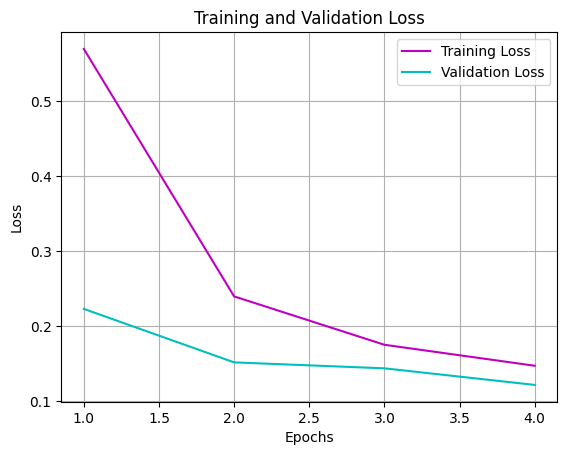

In [ ]:
plot_training_loss(model2_history)

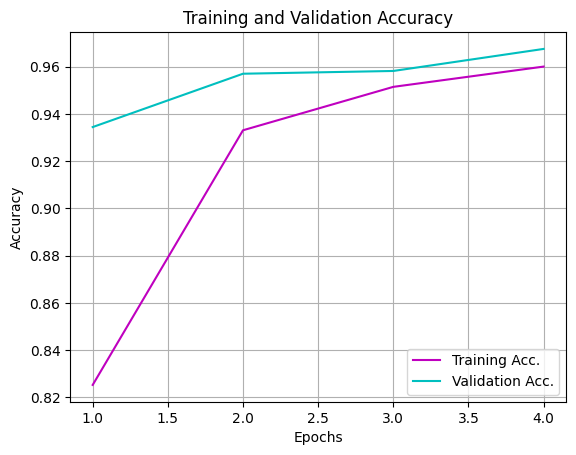

In [ ]:
plot_training_accuracy(model2_history)

By integrating an ideal number of training epochs along with incorporating a dropout layer at a 0.5 rate, we succeeded in converging the loss curves at the conclusion of the graph.

### 3.3 L2 Regularization with Loss and Validation Plots

For our upcoming model, we'll implement a weight decay strategy that shrinks each weight, ensuring that no individual feature disproportionately affects the model's predictions.

In [ ]:
model3 = Sequential([
                    Flatten(input_shape=(28, 28)),
                    Dense(128, activation = 'relu', kernel_regularizer=regularizers.l2(0.01)),
                    Dense(64, activation = 'relu', kernel_regularizer=regularizers.l2(0.01)),
                    Dropout(0.5),
                    Dense(48, activation = 'relu', kernel_regularizer=regularizers.l2(0.01)),
                    Dense(16, activation = 'relu'),
                    Dense(10, activation = 'softmax')
], name='model_3')

model3.summary()
model3.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

model3_history = model3.fit(X_train, y_train,
                 epochs = optimal, batch_size = 64,
                 validation_data = (X_holdout, y_holdout)
                )

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_37 (Flatten)        (None, 784)               0         
                                                                 
 dense_161 (Dense)           (None, 128)               100480    
                                                                 
 dense_162 (Dense)           (None, 64)                8256      
                                                                 
 dropout_13 (Dropout)        (None, 64)                0         
                                                                 
 dense_163 (Dense)           (None, 48)                3120      
                                                                 
 dense_164 (Dense)           (None, 16)                784       
                                                                 
 dense_165 (Dense)           (None, 10)                170 

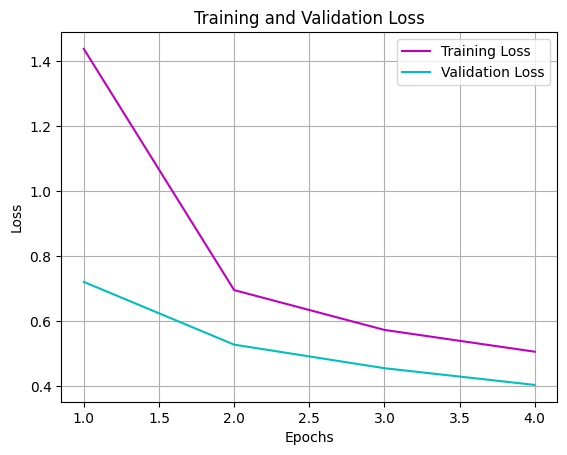

In [ ]:
plot_training_loss(model3_history)

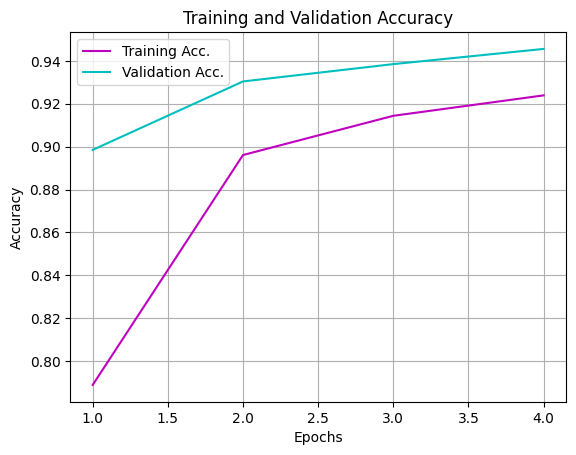

In [ ]:
plot_training_accuracy(model3_history)

Introducing L2 regularization appears to have broadened the model's curve, indicating it might not be the most suitable regularization technique for our scenario.

## 4 Interpretation of Results

In summary, the model is fine-tuned to a point where both the training and validation losses decreased steadily and eventually leveled out. Despite efforts to precisely adjust the model parameters to ensure that the training and validation losses remain constant throughout, the models often succumbed to overfitting with even slight changes. The base model has a high accuracy of 97.43%, suggesting a strong performance. The overfitted model has slightly higher accuracy at 97.61%, but this might not generalize well to new, unseen data. The optimally tuned model, while having a slightly lower accuracy of 97.08% than the base and overfitted models, is likely to offer a better balance between learning from the training data and generalizing to new data, especially since it's been adjusted to mitigate overfitting with Dropout. This could mean that it may perform more consistently and reliably in real-world scenarios.

### 4.1 Base Model Results

313/313 [==============================] - 1s 2ms/step - loss: 0.0851 - accuracy: 0.9743
Validation Accuracy: 97.43%


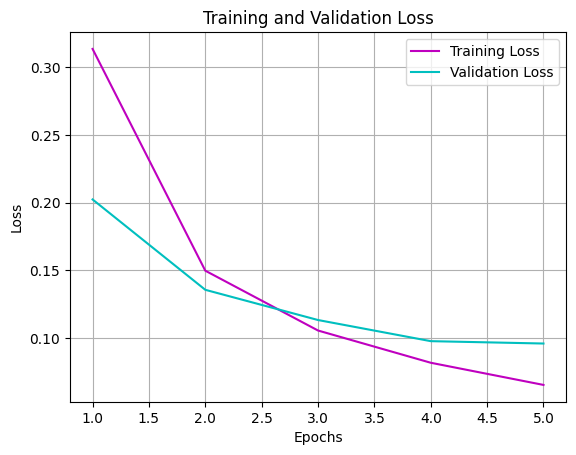

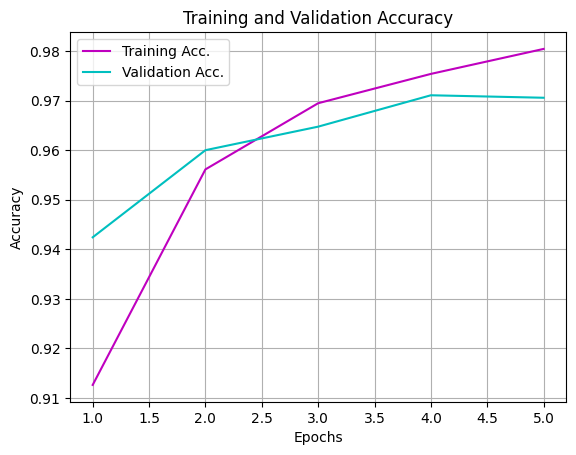

In [ ]:
test_loss, test_acc = base_model.evaluate(X_test, y_test_one_hot)
print('Validation Accuracy: {:.2f}%'.format(test_acc * 100))

plot_training_loss(base_model_history)
plot_training_accuracy(base_model_history)

### 4.2 Overfitted Model Results

313/313 [==============================] - 1s 2ms/step - loss: 0.1718 - accuracy: 0.9761
Validation Accuracy: 97.61%


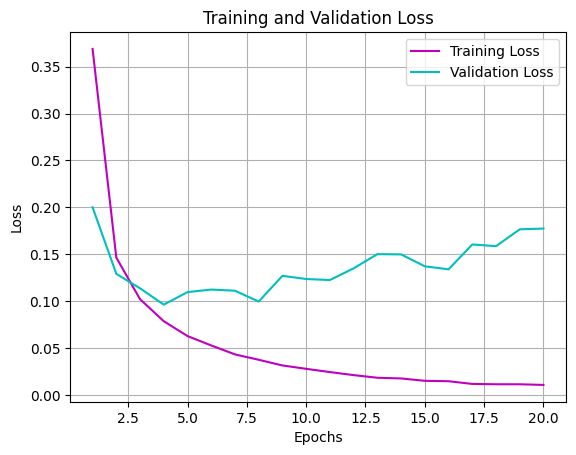

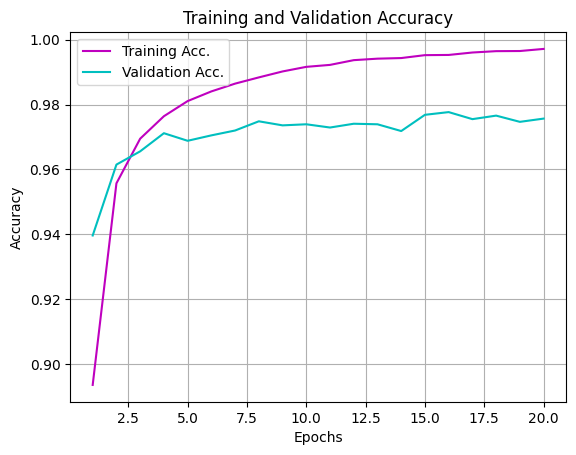

In [ ]:
test_loss, test_acc = overfitted_model.evaluate(X_test, y_test_one_hot)
print('Validation Accuracy: {:.2f}%'.format(test_acc * 100))

plot_training_loss(overfitted_model_history)
plot_training_accuracy(overfitted_model_history)

### 4.3 Optimal Model Results

313/313 [==============================] - 1s 4ms/step - loss: 0.1088 - accuracy: 0.9708
Validation Accuracy: 97.08%


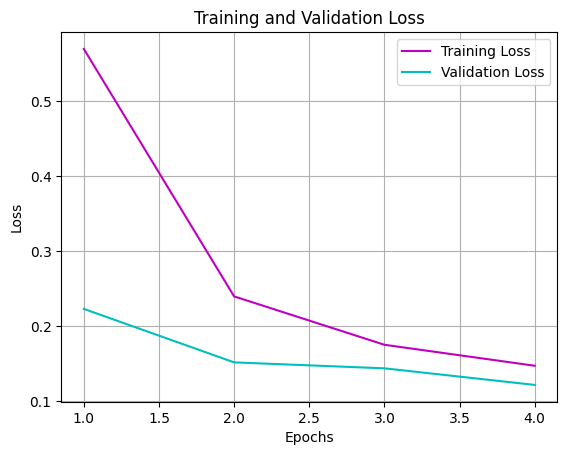

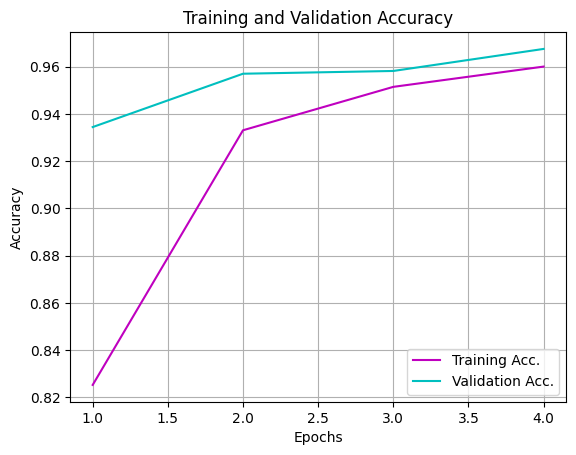

In [ ]:
# 4 Epochs
# 0.5 Dropout Rate
test_loss, test_acc = model2.evaluate(X_test, y_test_one_hot)
print('Validation Accuracy: {:.2f}%'.format(test_acc * 100))

plot_training_loss(model2_history)
plot_training_accuracy(model2_history)

## 5 References

Francois Chollet. 2017. Deep Learning with Python. Simon and Schuster.
  
mnist. TensorFlow. Retrieved March 11, 2024 from https://www.tensorflow.org/datasets/catalog/mnist

Nitish Srivastava, Geoffrey Hinton, Alex Krizhevsky, Ilya Sutskever, and Ruslan Salakhutdinov. 2014. Dropout: a simple way to prevent neural networks from overfitting. J. Mach. Learn. Res. 15, 1 (0 2014), 1929–1958.
  

